In [1]:
#Importing the Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# Loading the Dataset into the Python Environment¶

In [2]:
data = pd.read_csv("Wine.csv")
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no missing values

In [7]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

In [9]:
for cols in data.columns.values:
    print("Number of unique values in the feature {} = {}".format(cols, data[cols].nunique()))    

Number of unique values in the feature Alcohol = 126
Number of unique values in the feature Malic_Acid = 133
Number of unique values in the feature Ash = 79
Number of unique values in the feature Ash_Alcanity = 63
Number of unique values in the feature Magnesium = 53
Number of unique values in the feature Total_Phenols = 97
Number of unique values in the feature Flavanoids = 132
Number of unique values in the feature Nonflavanoid_Phenols = 39
Number of unique values in the feature Proanthocyanins = 101
Number of unique values in the feature Color_Intensity = 132
Number of unique values in the feature Hue = 78
Number of unique values in the feature OD280 = 122
Number of unique values in the feature Proline = 121


The maximum unique value is Malic_acid and The minimum unique value is Nonflavanoid_Phenols.

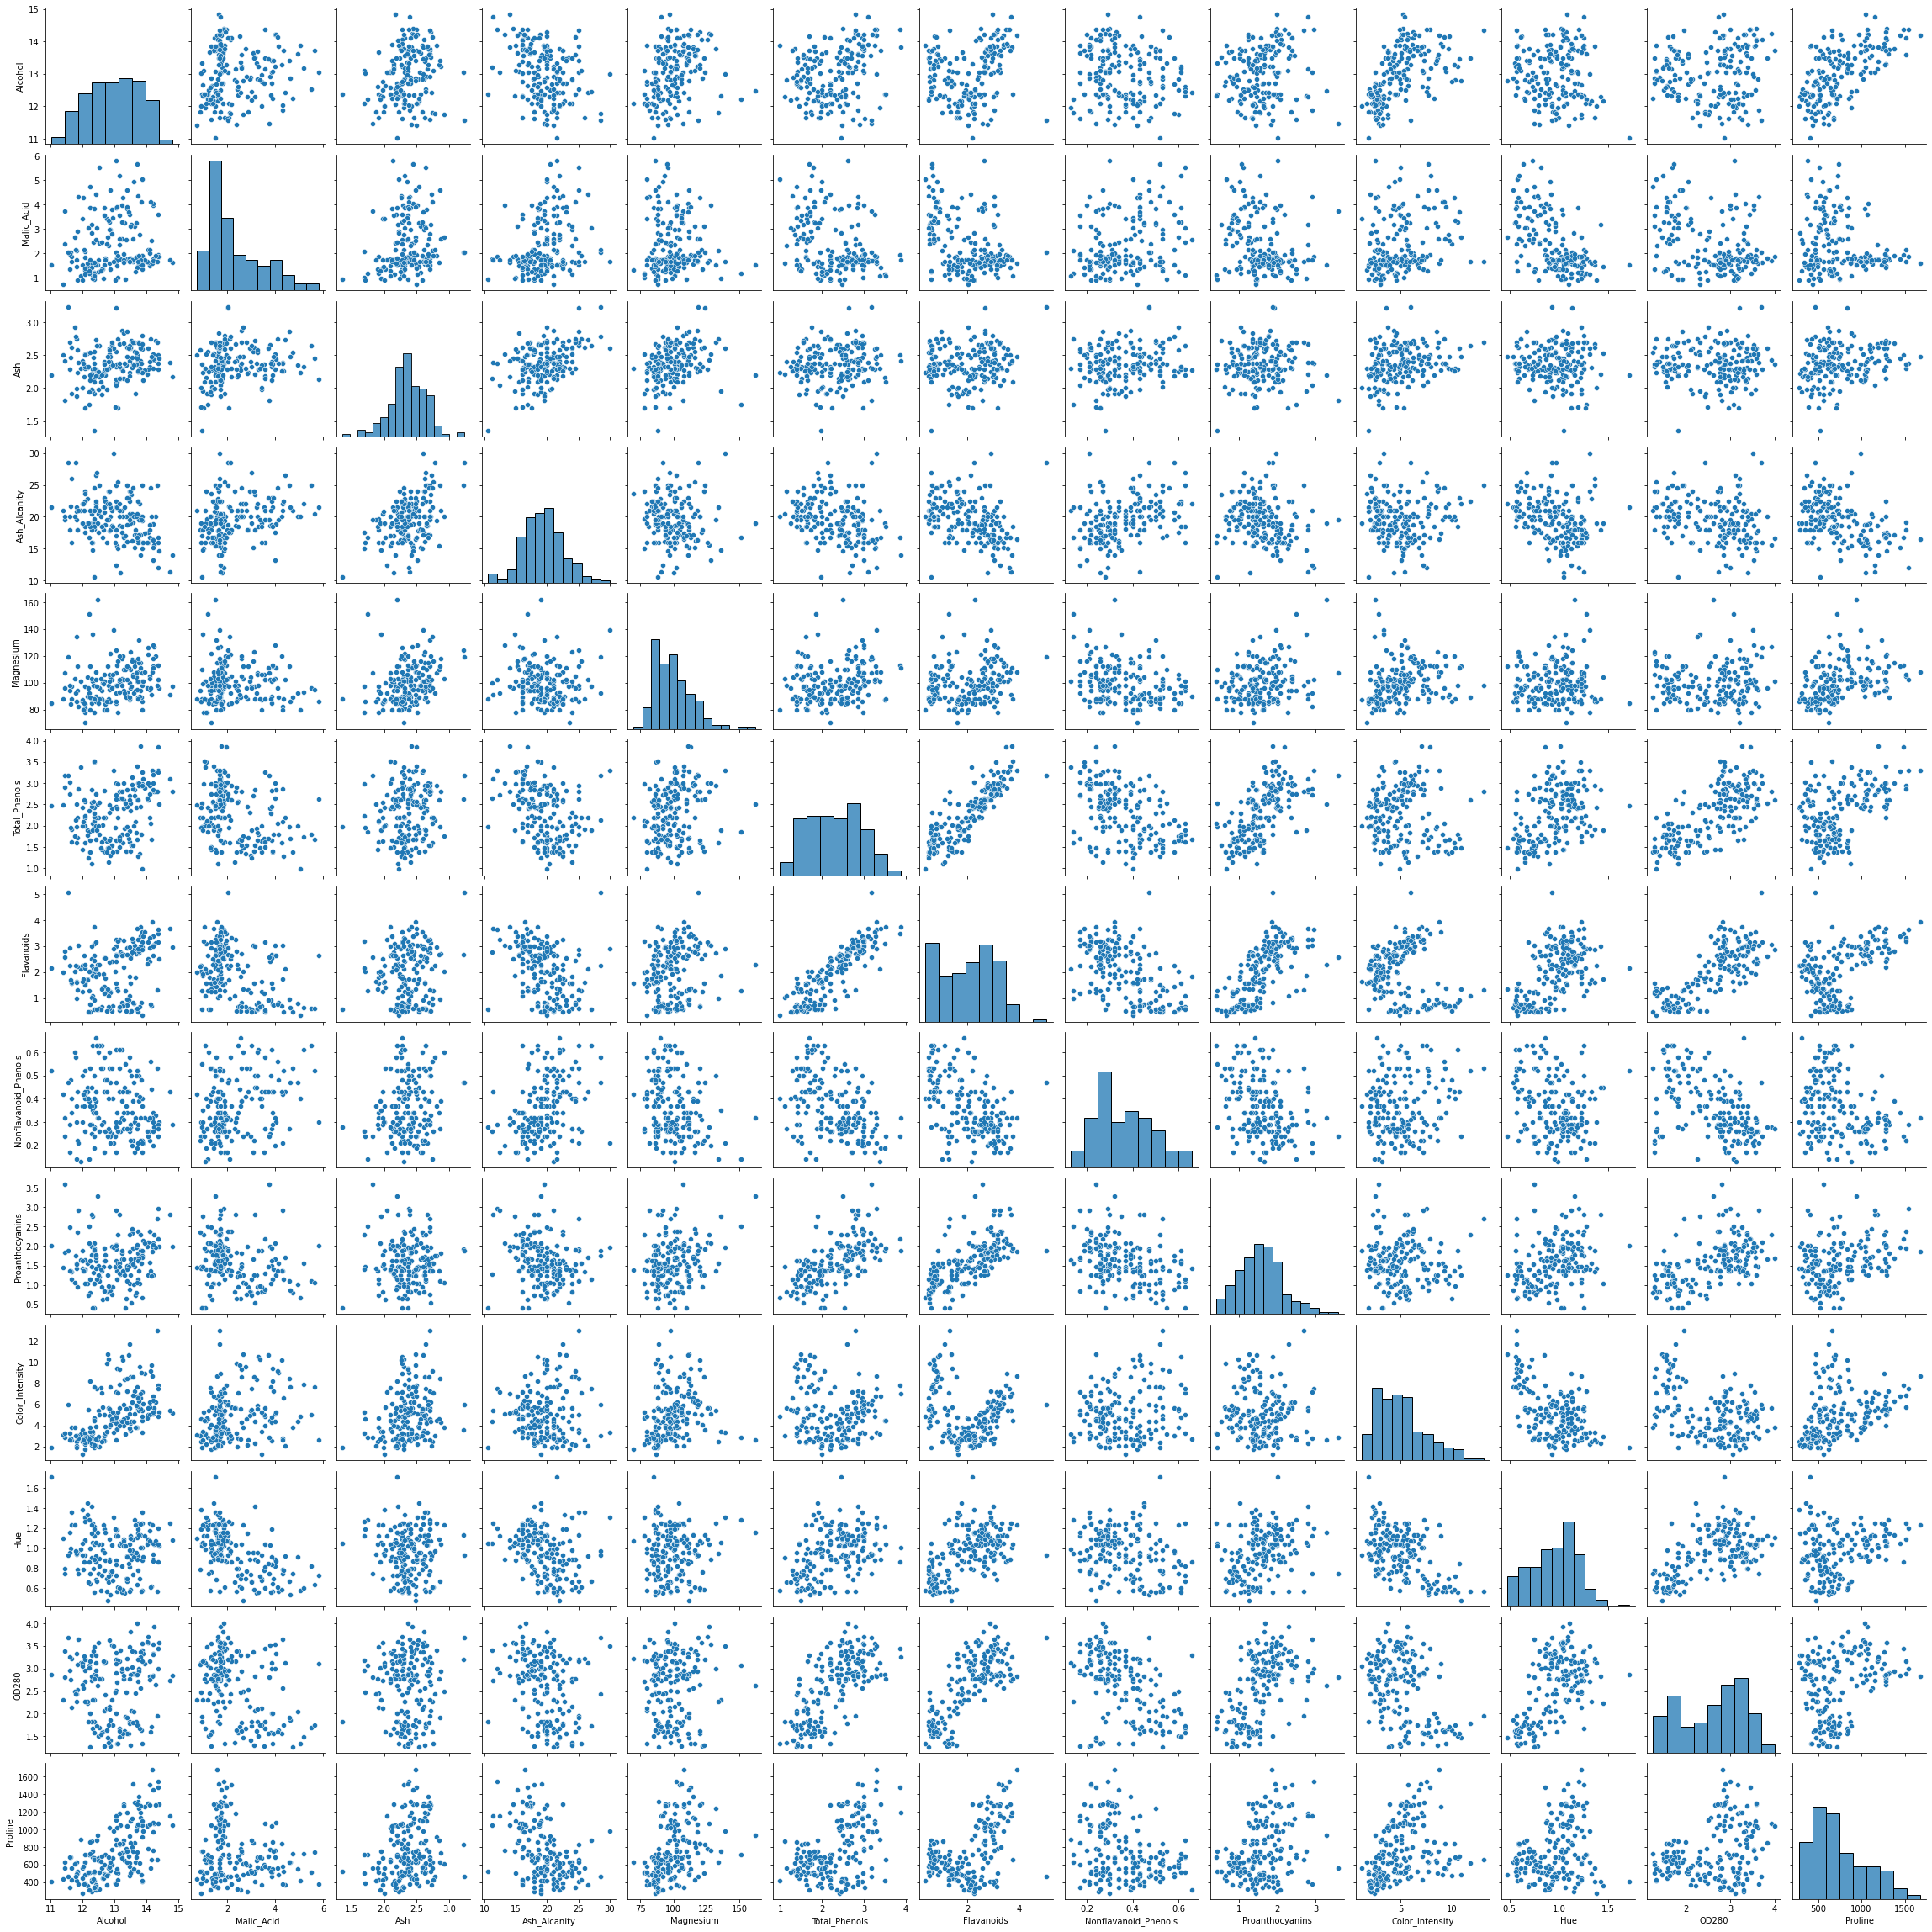

In [10]:
#Exploratory Data Analytics
sns.pairplot(data)

[]

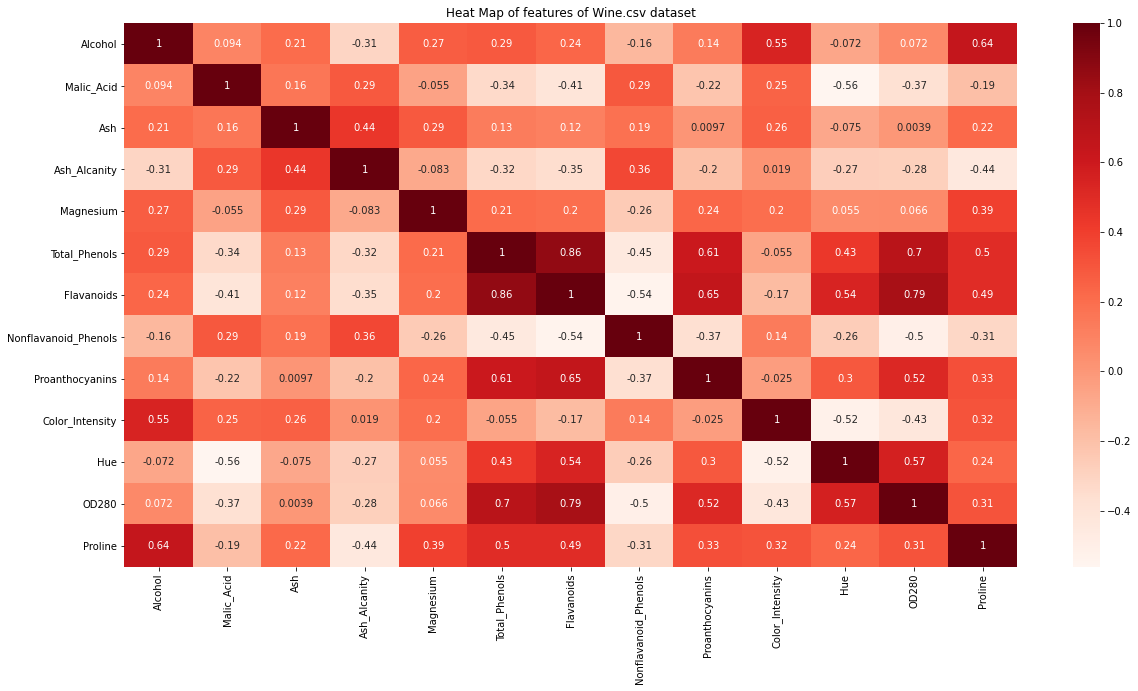

In [11]:
plt.figure(figsize=(20,10))
plt.title('Heat Map of features of Wine.csv dataset')
sns.heatmap(data.corr(),annot=True,cmap="Reds")
plt.plot()

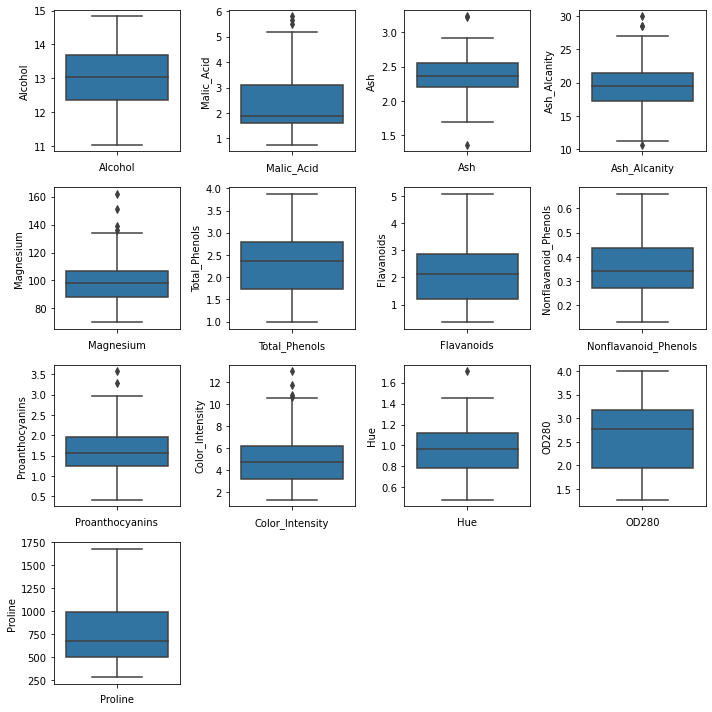

In [12]:
fig = plt.figure(figsize=(10,10))
for i in range(len(data.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=data.iloc[:,i])
    plt.xlabel(data.columns[i])
plt.tight_layout()
plt.show()

When we look at this we can easily identfy the outliers and also the frequency.

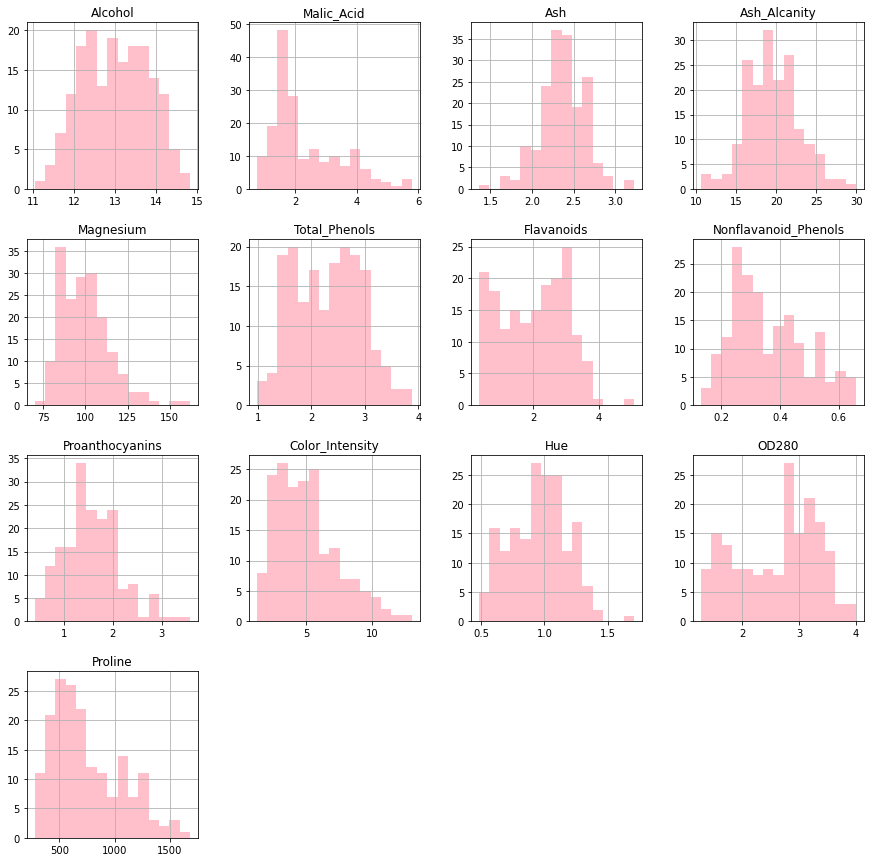

In [13]:
plt.rcParams["figure.figsize"] = (15, 15)
data.hist(bins=15, color = 'Pink')
plt.show()

In [14]:
#Data Pre-processing
data_cluster=data.copy()
data_agglo=data.copy()
data_pca = data.copy()

In [15]:
#Standard Scaling
scaler = StandardScaler()
data_cluster = scaler.fit_transform(data_cluster)
data_agglo = scaler.fit_transform(data_agglo)
data_pca -= scaler.fit_transform(data_pca)

# KMeans Clustering

In [16]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(data_cluster)

centroids = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_
y_kmeans = kmeans.predict(data_cluster)

No handles with labels found to put in legend.


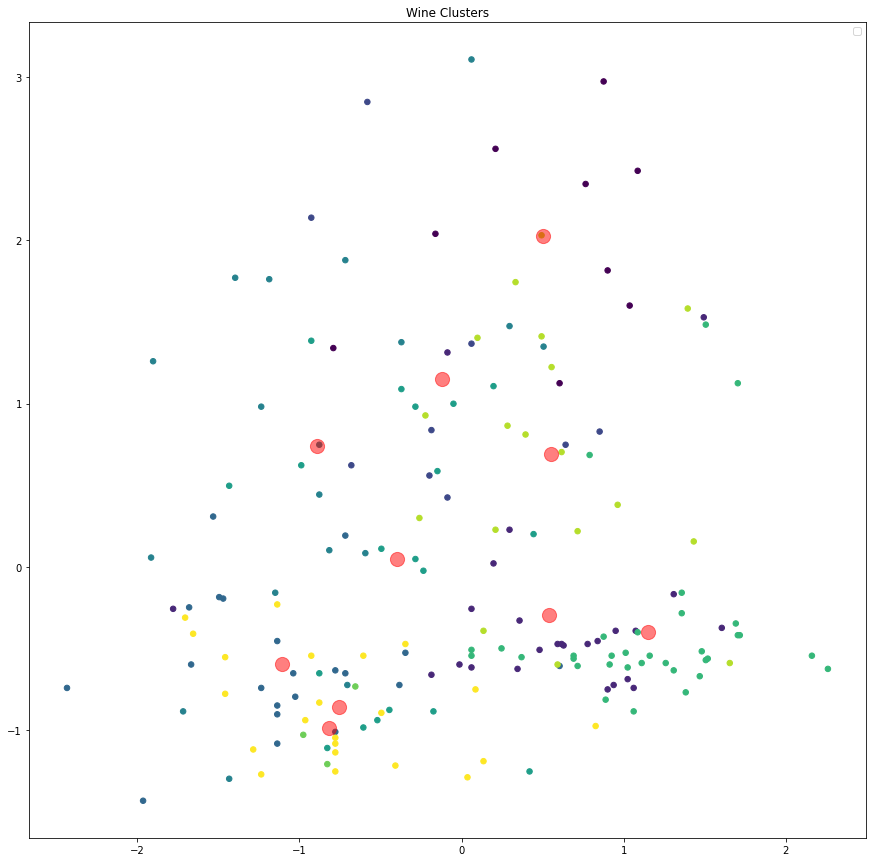

In [17]:
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Red', s=200, alpha=0.5);
plt.title('Wine Clusters')
plt.legend()
plt.show()

Here we can see that the data point in the dataset is divided in to 10 clusters

C:\Users\jaseem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


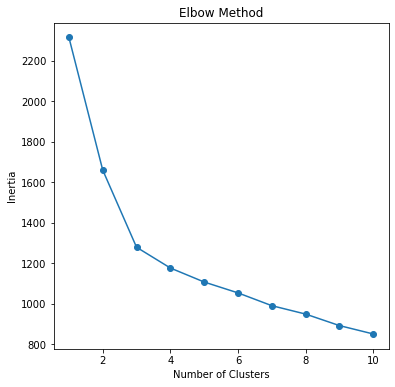

In [18]:
#Using Elbow Method for Finding the Optimal Number of Clusters 
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (6,6))
plt.plot(range(1,11), inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The above figure we can see that  the otipal number of clusters is 3 

In [19]:
#Applying the optimal number of clusters in KMeans Clustering¶
model_kmeans = KMeans(n_clusters = 3)
kmeans2_pred = model_kmeans.fit_predict(data_cluster)

In [20]:
pipe = make_pipeline(scaler, model_kmeans)
pipe.fit(data_cluster)
label_sc = pipe.predict(data_cluster)
print(label_sc)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


No handles with labels found to put in legend.


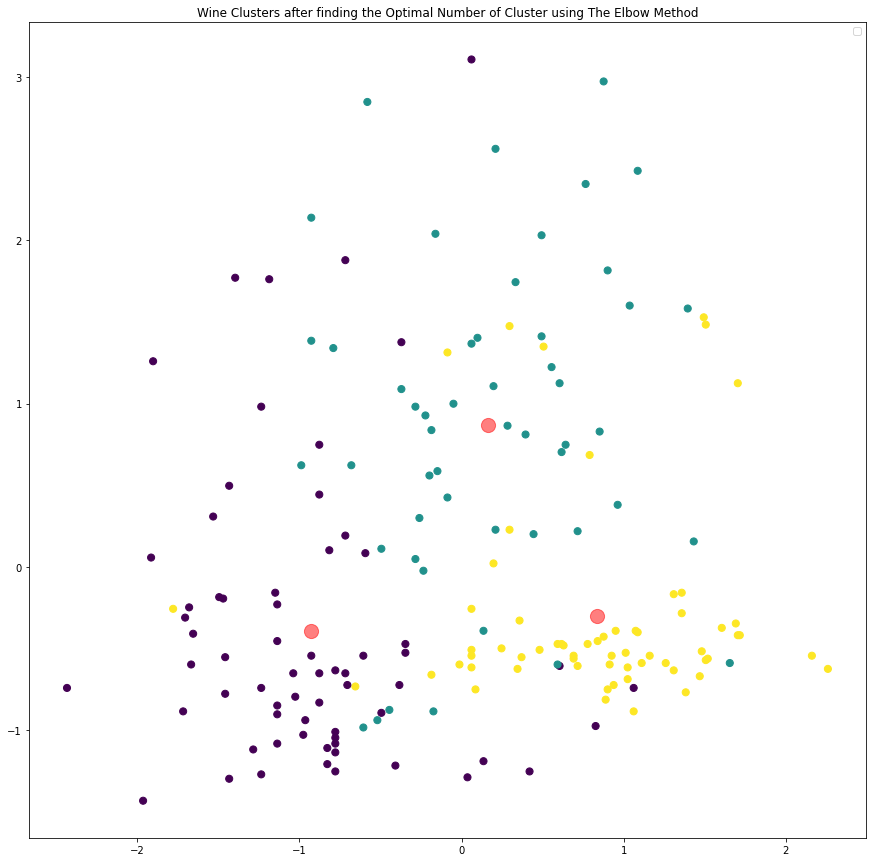

In [21]:
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=label_sc, s=50, cmap='viridis')
centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Red', s=200, alpha=0.5);
plt.title('Wine Clusters after finding the Optimal Number of Cluster using The Elbow Method')
plt.legend()
plt.show()

The above scatter plot shows the datapoints in the dataset being divided into 3 clusters.

# Agglomerative Hierarchial Clustering¶

In [22]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_agglo)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)

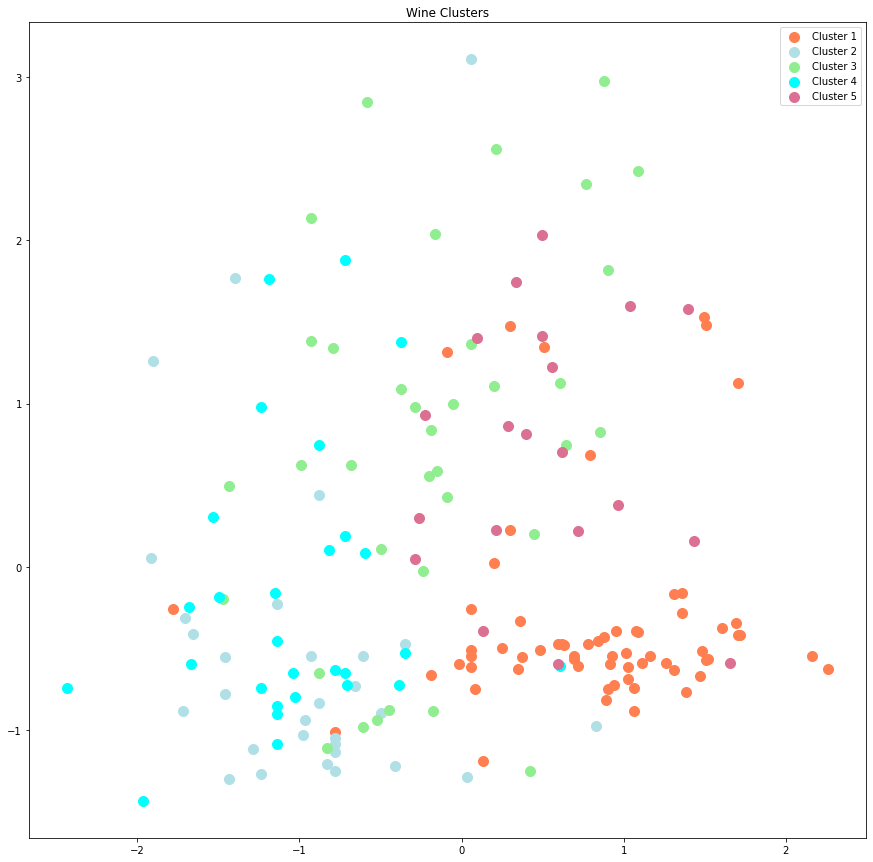

In [23]:
plt.scatter(data_agglo[y_hc == 0,0], data_agglo[y_hc == 0,1], s = 100, c = 'coral', label = 'Cluster 1')
plt.scatter(data_agglo[y_hc == 1,0], data_agglo[y_hc == 1,1], s = 100, c = 'powderblue', label = 'Cluster 2')
plt.scatter(data_agglo[y_hc == 2,0], data_agglo[y_hc == 2,1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(data_agglo[y_hc == 3,0], data_agglo[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_agglo[y_hc == 4,0], data_agglo[y_hc == 4,1], s = 100, c = 'palevioletred', label = 'Cluster 5')
plt.title('Wine Clusters')
plt.legend()
plt.show()

The above scatter plot shows the datapoints in the dataset being divided into 5 clusters.

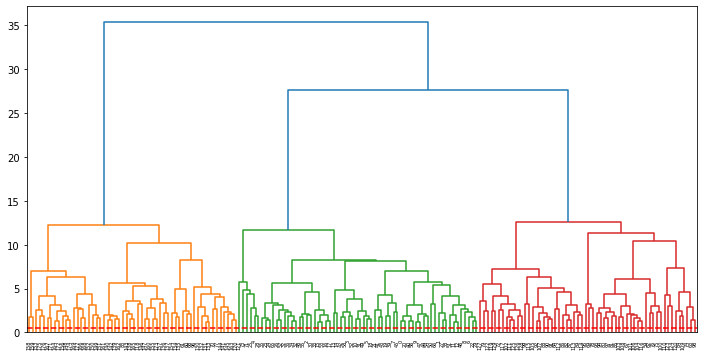

In [24]:
linked = linkage(data_agglo, method ='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, orientation = "top", distance_sort = "ascending", show_leaf_counts = True)
plt.hlines(0.5,0,5000, colors = 'r', linestyles = 'dashed')
plt.show()

From the dendrogram we can notice that the number of clusters is equal to 3.

In [25]:
#Applying the optimal number of clusters in Agglomerative Hierarchical Clustering¶
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_agglo)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

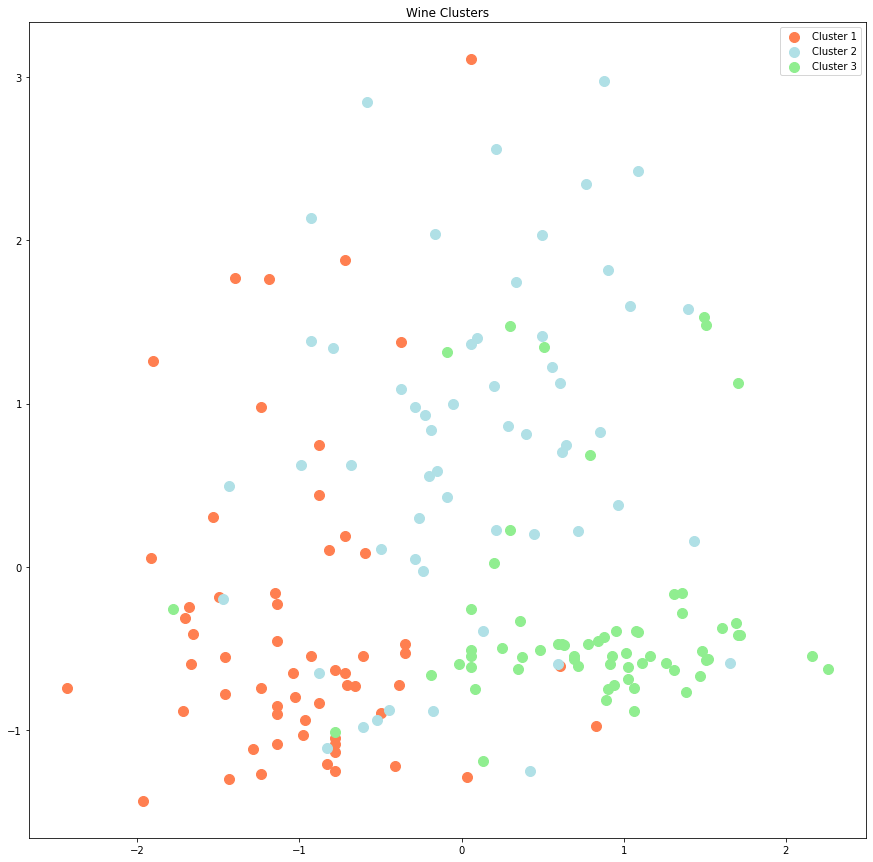

In [26]:
plt.scatter(data_agglo[y_hc == 0,0], data_agglo[y_hc == 0,1], s = 100, c = 'coral', label = 'Cluster 1')
plt.scatter(data_agglo[y_hc == 1,0], data_agglo[y_hc == 1,1], s = 100, c = 'powderblue', label = 'Cluster 2')
plt.scatter(data_agglo[y_hc == 2,0], data_agglo[y_hc == 2,1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.title('Wine Clusters')
plt.legend()
plt.show()

# Principal Component Analysis¶


In [27]:

pca = PCA(n_components = 2)
data_2D = pca.fit_transform(data_pca)
data_2D = np.concatenate((data_2D, y_hc[:,None]), axis=1)
pca_final = pd.DataFrame(data_2D, columns=['X', 'Y', 'Label'])
pca_final.head()

X          Y  Label
0  317.480526  20.019862    2.0
1  302.120494  -4.900581    2.0
2  436.671392  -6.080353    2.0
3  730.880734   0.168345    2.0
4  -11.573773  17.196678    2.0

After  applying the pca we have reduced the dimensionality from 13 to 2

Text(0, 0.5, 'Second Principal Component')

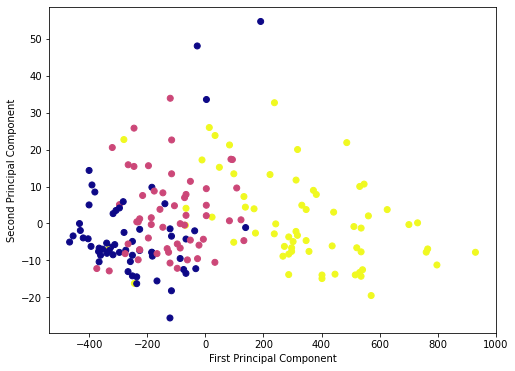

In [28]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=pca_final['Label'] ,cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# submitted by
# zeenath m